# 3교시 3. 성능 향상 기법

### 데이터의 확인과 검증셋

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# 깃허브에 준비된 데이터를 가져옵니다.
!git clone https://github.com/taehojo/data.git

# 와인 데이터를 불러옵니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 데이터를 미리 보겠습니다.
df

fatal: destination path 'data' already exists and is not an empty directory.


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [7]:
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

<img src="https://github.com/taehojo/fastcampus_ai/blob/master/data/img/03-06.png?raw=1" width="300"/>

In [8]:
# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 0.8 x 0.25 = 0.2

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7386 - loss: 1.7302 - val_accuracy: 0.7685 - val_loss: 1.3146
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7584 - loss: 1.3619 - val_accuracy: 0.7923 - val_loss: 0.9480
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7840 - loss: 0.9420 - val_accuracy: 0.8131 - val_loss: 0.6169
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8093 - loss: 0.5696 - val_accuracy: 0.8323 - val_loss: 0.3681
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8340 - loss: 0.3508 - val_accuracy: 0.8515 - val_loss: 0.2989
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8378 - loss: 0.3269 - val_accuracy: 0.8708 - val_loss: 0.2875
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8620 - loss: 0.2966 - val_accuracy: 0.8838 - val_loss: 0.2782
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8747 - loss: 0.2785 - val_accuracy: 0.8923 - val_loss: 0.2631


In [9]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9515 - loss: 0.1428
Test accuracy: 0.9553846120834351


## 모델 업데이트하기

### 기본 코드 불러오기

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 깃허브에 준비된 데이터를 가져옵니다. 앞에서 이미 데이터를 가져왔으므로 주석 처리합니다. 2번 예제만 별도 실행 시 주석을 해제한 후 실행해주세요.
# !git clone https://github.com/taehojo/data.git

# 와인 데이터를 불러옵니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

### 모델의 저장 설정 및 실행

In [11]:
# 모델 저장의 조건을 설정합니다.
modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all/01-0.2408.keras

Epoch 2: saving model to ./data/model/all/02-0.6638.keras

Epoch 3: saving model to ./data/model/all/03-0.7600.keras

Epoch 4: saving model to ./data/model/all/04-0.7600.keras

Epoch 5: saving model to ./data/model/all/05-0.7600.keras

Epoch 6: saving model to ./data/model/all/06-0.7654.keras

Epoch 7: saving model to ./data/model/all/07-0.7792.keras

Epoch 8: saving model to ./data/model/all/08-0.7531.keras

Epoch 9: saving model to ./data/model/all/09-0.7562.keras

Epoch 10: saving model to ./data/model/all/10-0.8138.keras

Epoch 11: saving model to ./data/model/all/11-0.8354.keras

Epoch 12: saving model to ./data/model/all/12-0.8554.keras

Epoch 13: saving model to ./data/model/all/13-0.8592.keras

Epoch 14: saving model to ./data/model/all/14-0.8738.keras

Epoch 15: saving model to ./data/model/all/15-0.8946.keras

Epoch 16: saving model to ./data/model/all/16-0.9123.keras

Epoch 17: saving model to ./data/model/all/17-0.

In [ ]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1686 - accuracy: 0.9392
Test accuracy: 0.939230740070343


## 그래프로 과적합 확인하기

In [12]:
# 그래프 확인을 위한 긴 학습
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9527 - loss: 0.1462 - val_accuracy: 0.9585 - val_loss: 0.1164
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9537 - loss: 0.1417 - val_accuracy: 0.9608 - val_loss: 0.1143
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9547 - loss: 0.1327 - val_accuracy: 0.9600 - val_loss: 0.1127
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9519 - loss: 0.1433 - val_accuracy: 0.9608 - val_loss: 0.1108
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9586 - loss: 0.1252 - val_accuracy: 0.9615 - val_loss: 0.1131
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9575 - loss: 0.1278 - val_accuracy: 0.9631 - val_loss: 0.1085
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9568 - loss: 0.1275 - val_accuracy: 0.9615 - val_loss: 0.1102
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9539 - loss: 0.1330 - val_accuracy: 0.9638 - v

In [ ]:
# history에 저장된 학습 결과를 확인해 보겠습니다.
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.147854,0.947395,0.163222,0.938462
1,0.146364,0.948165,0.161854,0.940769
2,0.145011,0.947909,0.160797,0.940000
3,0.144104,0.947909,0.158959,0.946154
4,0.142609,0.948935,0.159250,0.940769
...,...,...,...,...
1995,0.030691,0.992045,0.071841,0.983077
1996,0.030978,0.992558,0.070400,0.985385
1997,0.030977,0.992045,0.074907,0.985385
1998,0.032843,0.990762,0.078405,0.984615


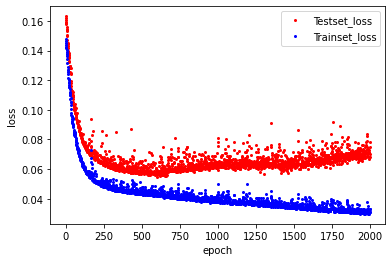

In [ ]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

#x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 학습의 자동 중단

### 기본 코드 불러오기

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

# 깃허브에 준비된 데이터를 가져옵니다. 앞에서 이미 데이터를 가져왔으므로 주석 처리합니다. 2번 예제만 별도 실행 시 주석을 해제한 후 실행해주세요.
# !git clone https://github.com/taehojo/data.git

# 와인 데이터를 불러옵니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

### 학습의 자동 중단 및 최적화 모델 저장

In [14]:
# 학습이 언제 자동 중단될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/Bestmodel.keras"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])


Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.2424 - loss: 3.2170 - val_accuracy: 0.2462 - val_loss: 1.7985
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3131 - loss: 1.3437 - val_accuracy: 0.8892 - val_loss: 0.3923
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8856 - loss: 0.3670 - val_accuracy: 0.8523 - val_loss: 0.3541
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8437 - loss: 0.3576 - val_accuracy: 0.8308 - val_loss: 0.3574
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8234 - loss: 0.3635 - val_accuracy: 0.8308 - val_loss: 0.3485
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8308 - loss: 0.3515 - val_accuracy: 0.8492 - val_loss: 0.3355
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8470 - loss: 0.3308 - val_accuracy: 0.8615 - val_loss: 0.3176
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8642 - loss: 0.3113 - val_accuracy: 0.8831 - v

In [ ]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.0472 - accuracy: 0.9885
Test accuracy: 0.9884615540504456
